<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_gen_vib_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [8]:
df1 = pd.read_excel('output_gen_brg_vib_9362_9367_9371_9372.xlsx')

In [9]:
df1.head(10)

,AssetID_9362,AssetID_9363,AssetID_9364,AssetID_9365,AssetID_9366,AssetID_9367,AssetID_9371,AssetID_9372,date
0,53.0,18.0,49.0,27.0,19.0,14.0,66.0,65.0,2021-03-16 05:38:30
1,55.0,18.0,52.0,28.6,20.3,13.0,65.0,58.0,2021-03-17 09:02:17
2,55.0,19.0,55.0,28.0,22.0,13.0,61.0,60.0,2021-03-18 06:12:19
3,64.0,17.0,46.0,25.0,28.0,8.0,61.0,61.0,2021-03-19 08:34:49
4,58.0,20.0,67.0,39.0,29.0,10.0,56.0,55.0,2021-03-20 17:46:50
5,57.0,20.0,68.0,38.0,29.0,11.0,55.0,54.0,2021-03-20 19:51:22
6,54.0,20.0,58.0,29.0,22.0,13.0,61.0,60.0,2021-03-20 23:00:21
7,54.0,20.0,57.0,28.0,21.0,13.0,63.0,62.0,2021-03-21 02:10:51
8,52.0,19.0,52.0,28.0,24.0,13.0,64.0,56.0,2021-03-21 04:51:18
9,58.0,20.0,58.0,29.0,27.0,12.0,60.0,60.0,2021-03-21 07:42:14


In [10]:
df1.columns

Index(['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'date'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

# انتخاب ستون‌ها برای استانداردسازی
data_to_scale = df1[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372']]

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# تبدیل خروجی به دیتافریم با همان نام ستون‌ها
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372'])

# نمایش ۵ ردیف اول
print(scaled_df.head())


   AssetID_9362  AssetID_9363  AssetID_9364  AssetID_9365  AssetID_9366  \
0     -1.431691     -0.737316     -0.663103     -1.070140     -1.876557   
1     -1.260171     -0.737316     -0.399620     -0.928075     -1.786188   
2     -1.260171     -0.573890     -0.136137     -0.981349     -1.668015   
3     -0.488330     -0.900741     -0.926586     -1.247721     -1.250932   
4     -1.002891     -0.410465      0.917794     -0.004655     -1.181418   

   AssetID_9367  AssetID_9371  AssetID_9372  
0     -0.980522      0.998734      0.616436  
1     -1.009717      0.655069     -1.513953  
2     -1.009717     -0.719591     -0.905270  
3     -1.155691     -0.719591     -0.600929  
4     -1.097301     -2.437917     -2.426977  


In [12]:
scaled_df_clean = scaled_df.dropna()

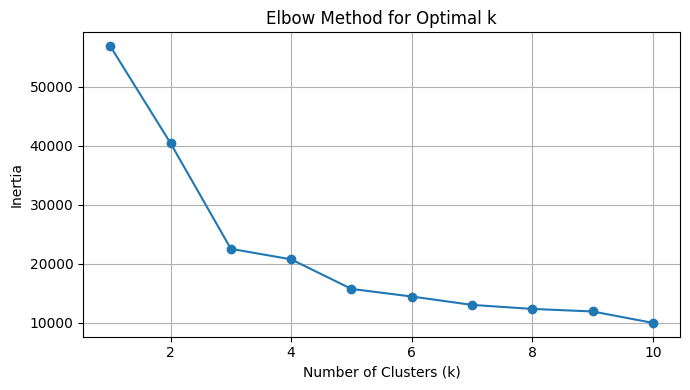

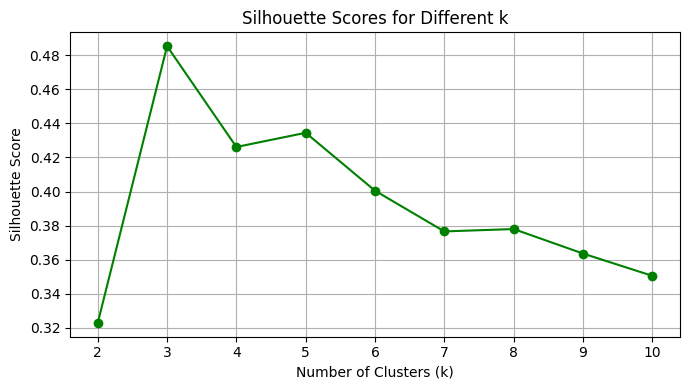

In [13]:
X = scaled_df_clean[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


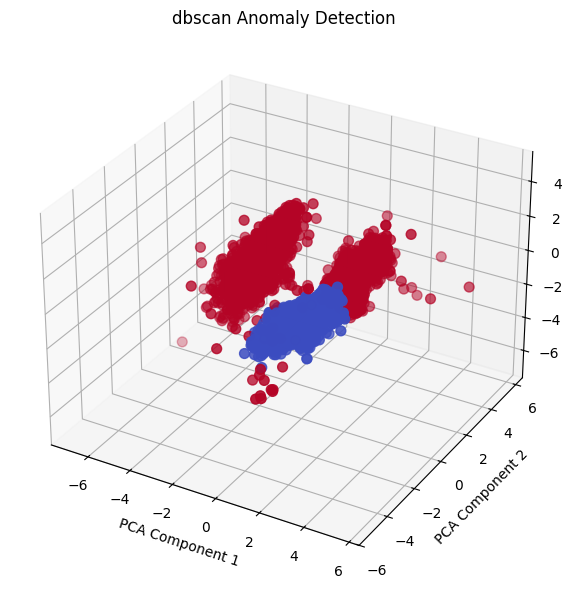

In [14]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('dbscan Anomaly Detection')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


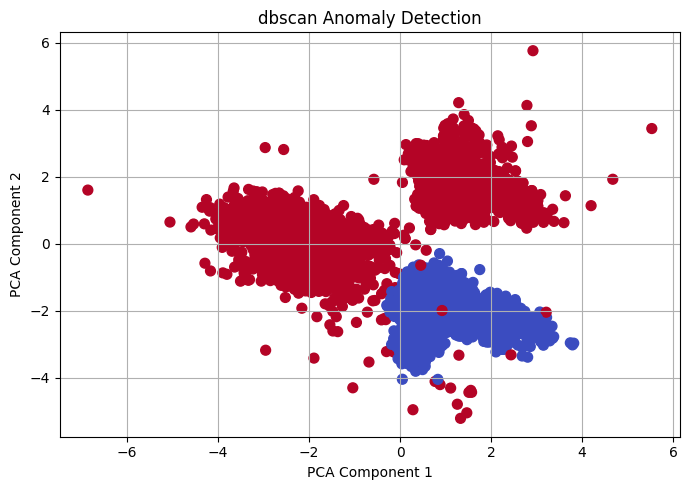

In [16]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('dbscan Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

num_abnormal = np.sum(labels == -1)
num_total = len(labels)
print(f"درصد ناهنجاری‌ها: {100 * num_abnormal / num_total:.2f}%")


In [ ]:
import pandas as pd

# ساخت یک سری از برچسب‌های خوشه
cluster_series = pd.Series(labels)

# شمارش تعداد اعضای هر خوشه
cluster_counts = cluster_series.value_counts().sort_index()

# نمایش نتایج
print("تعداد داده‌ها در هر خوشه:")
for cluster_id, count in cluster_counts.items():
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise (abnormal)"
    print(f"{label}: {count} مورد")


In [ ]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد با PCA برای نمایش و تحلیل
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# فیلتر کردن داده‌های نرمال (برچسب ≠ -1)
mask = labels != -1
pca_filtered = pca_result[mask]
labels_filtered = labels[mask]

# محاسبه نمرات سیلوئت
silhouette_vals = silhouette_samples(pca_filtered, labels_filtered)
silhouette_avg = silhouette_score(pca_filtered, labels_filtered)

# رسم نمودار سیلوئت
plt.figure(figsize=(7, 5))
y_lower = 10
for i in np.unique(labels_filtered):
    ith_cluster_silhouette_vals = silhouette_vals[labels_filtered == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"میانگین سیلوئت = {silhouette_avg:.2f}")
plt.xlabel("ضریب سیلوئت")
plt.ylabel("نمونه‌ها بر اساس خوشه")
plt.title("نمودار سیلوئت برای خوشه‌های DBSCAN (بدون نقاط نویز)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = None

for eps in [0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 4, 5, 6]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(scaled_df_clean)

        # فقط نقاط نرمال را برای سیلوئت در نظر بگیر
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(scaled_df_clean[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples} → silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"\n✅ بهترین ترکیب: eps={best_params[0]}, min_samples={best_params[1]} با نمره سیلوئت {best_score:.3f}")


In [ ]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.9, min_samples=6) # Using the best params found earlier
labels = dbscan.fit_predict(scaled_df_clean)

# اضافه کردن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['dbscan_label'] = labels

# افزودن برچسب DBSCAN به دیتافریم اصلی با استفاده از ایندکس
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left')

# فیلتر کردن نمونه‌های غیرنرمال (برچسب -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# انتخاب ۱۰ نمونه تصادفی از موارد غیرنرمال
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# نمایش جدول نهایی
print("🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):")
print(abnormal_sample)

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.9, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# افزودن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['dbscan_label'] = labels

# افزودن برچسب DBSCAN به دیتافریم اصلی با استفاده از ایندکس
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left', suffixes=('', '_y'))

# حذف ستون‌های تکراری در صورت وجود
df1 = df1.loc[:, ~df1.columns.duplicated()]

# فیلتر کردن نمونه‌های غیرنرمال (برچسب -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# انتخاب ۱۰ نمونه تصادفی از موارد غیرنرمال
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# حذف ستون برچسب DBSCAN
abnormal_sample = abnormal_sample.drop(columns=['dbscan_label'])

# نمایش جدول نهایی به‌صورت یکپارچه
pd.set_option('display.max_columns', None)  # نمایش تمام ستون‌ها
pd.set_option('display.width', None)        # جلوگیری از شکستن خطوط
print("🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):")
print(abnormal_sample)


In [ ]:
# تبدیل جدول به HTML
html_output = abnormal_sample.to_html(index=False, border=1, justify='center')

# نمایش HTML در خروجی
print("🔍 خروجی HTML جدول نمونه‌های غیرنرمال:")
print(html_output)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای LOF روی داده‌های استانداردشده
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# اجرای LOF روی داده‌های استانداردشده
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

best_ratio = -1
best_params = None

for contamination in [0.01, 0.03, 0.05, 0.1]:
    for n_neighbors in [10, 15, 20, 25]:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        labels = lof.fit_predict(scaled_df_clean)

        # محاسبه درصد ناهنجاری‌ها
        num_abnormal = np.sum(labels == -1)
        ratio = num_abnormal / len(labels)

        print(f"n_neighbors={n_neighbors}, contamination={contamination} → abnormal ratio={ratio:.3f}")

        # انتخاب ترکیبی که بیشترین ناهنجاری منطقی را شناسایی کند
        if ratio > best_ratio and ratio < 0.2:  # محدود کردن به درصدهای منطقی
            best_ratio = ratio
            best_params = (n_neighbors, contamination)

print(f"\n✅ بهترین ترکیب: n_neighbors={best_params[0]}, contamination={best_params[1]} با نسبت ناهنجاری {best_ratio:.3f}")


In [ ]:
# اجرای K-Means روی داده‌های استانداردشده
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های K-Means
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('K-Means Clustering Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای خوشه‌بندی تجمعی روی داده‌های استانداردشده
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # تعداد خوشه‌ها قابل تنظیم است
cluster_labels = agglo.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای خوشه‌بندی با مدل مخلوط گاوسی روی داده‌های استانداردشده
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # تعداد خوشه‌ها قابل تنظیم است
gmm_labels = gmm.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های GMM در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# محدوده‌ای از تعداد خوشه‌ها برای آزمون
cluster_range = range(2, 10)

# ذخیره امتیازها برای مقایسه
gmm_scores = []
agglo_scores = []

for k in cluster_range:
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_df_clean)
    gmm_score = silhouette_score(scaled_df_clean, gmm_labels)
    gmm_scores.append(gmm_score)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo_labels = agglo.fit_predict(scaled_df_clean)
    agglo_score = silhouette_score(scaled_df_clean, agglo_labels)
    agglo_scores.append(agglo_score)

# نمایش بهترین تعداد خوشه‌ها
best_k_gmm = cluster_range[np.argmax(gmm_scores)]
best_k_agglo = cluster_range[np.argmax(agglo_scores)]

print(f"Best GMM n_components: {best_k_gmm} with silhouette score: {max(gmm_scores):.4f}")
print(f"Best Agglomerative n_clusters: {best_k_agglo} with silhouette score: {max(agglo_scores):.4f}")



In [ ]:
# اجرای Isolation Forest روی داده‌های استانداردشده
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های GMM در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [ ]:
# Re-run Isolation Forest to add 'anomaly_label' column
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

scaled_df_clean['anomaly_label'] = labels

# شمارش تعداد موارد نرمال و غیرنرمال
counts = scaled_df_clean['anomaly_label'].value_counts()

# نمایش نتایج
print("تعداد موارد نرمال (label = 1):", counts.get(1, 0))
print("تعداد موارد غیرنرمال (label = -1):", counts.get(-1, 0))

In [ ]:
# فرض بر این است که original_df شامل داده‌های اصلی قبل از نرمال‌سازی است
# و ایندکس آن با scaled_df_clean هم‌راستا است

# اضافه کردن برچسب ناهنجاری به دیتافریم اصلی
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# انتخاب ۱۰ نمونه تصادفی از داده‌ها
sample_df = df1[['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372','anomaly_label']].sample(n=10, random_state=42)

# نمایش نتایج
print("نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری:")
print(sample_df)


In [ ]:
# فرض بر این است که original_df شامل داده‌های اصلی قبل از نرمال‌سازی است
# و ایندکس آن با scaled_df_clean هم‌راستا است

# اضافه کردن برچسب ناهنجاری به دیتافریم اصلی
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# تبدیل برچسب‌های عددی به متنی
df1['anomaly_status'] = df1['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# انتخاب حداقل یک نمونه abnormal
abnormal_sample = df1[df1['anomaly_label'] == -1][['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status']].sample(n=1, random_state=42)

# انتخاب ۹ نمونه normal
normal_sample = df1[df1['anomaly_label'] == 1][['AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
       'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status']].sample(n=9, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_sample = pd.concat([abnormal_sample, normal_sample]).reset_index(drop=True)

print("نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری :")
print(final_sample)


In [ ]:
# انتخاب ۱۰ نمونه از موارد ناهنجار
abnormal_samples = df1[df1['anomaly_label'] == -1][[
    'AssetID_9362', 'AssetID_9363', 'AssetID_9364', 'AssetID_9365',
    'AssetID_9366', 'AssetID_9367', 'AssetID_9371', 'AssetID_9372', 'anomaly_status'
]].sample(n=10, random_state=42).reset_index(drop=True)

print("۱۰ نمونه از شرایط ناهنجار در داده‌های اصلی:")
print(abnormal_samples)


In [ ]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['cluster'] = labels

# تبدیل برچسب‌ها به وضعیت نرمال/غیرنرمال
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('DBSCAN Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = scaled_df_clean['cluster_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# فرض بر این است که df1 شامل داده‌های اصلی قبل از نرمال‌سازی است و ایندکس‌ها هم‌راستا هستند
df1['cluster_status'] = scaled_df_clean['cluster_status']

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های اصلی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):")
print(final_samples)


In [ ]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['cluster'] = labels
scaled_df_clean['cluster_status'] = scaled_df_clean['cluster'].map(lambda x: 'abnormal' if x == -1 else 'normal')

# انتقال برچسب‌ها به دیتافریم اصلی (مقادیر واقعی)
df1['cluster_status'] = scaled_df_clean['cluster_status']

# رسم نمودار با مقادیر واقعی و برچسب‌های نرمال/غیرنرمال
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # دمای روغن ترانس
    df1['AssetID_8313'],  # دمای سیم‌پیچ ترانس
    c=df1['cluster_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('DBSCAN Clustering Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil temperature')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = df1['cluster_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['cluster_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['cluster_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'cluster_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های واقعی همراه با وضعیت خوشه‌بندی (حداقل دو مورد abnormal):")
print(final_samples)


In [ ]:
# اجرای Isolation Forest روی داده‌های استانداردشده
iso_forest = IsolationForest(contamination=0.010, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب ناهنجاری به دیتافریم استانداردشده
scaled_df_clean['anomaly_label'] = labels
scaled_df_clean['anomaly_status'] = scaled_df_clean['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# انتقال برچسب‌ها به دیتافریم اصلی (مقادیر واقعی)
df1['anomaly_status'] = scaled_df_clean['anomaly_status']

# رسم نمودار با مقادیر واقعی و برچسب‌های نرمال/غیرنرمال
plt.figure(figsize=(7, 4))
plt.scatter(
    df1['AssetID_8312'],  # دمای روغن ترانس
    df1['AssetID_8313'],  # دمای سیم‌پیچ ترانس
    c=df1['anomaly_status'].map({'normal': 0, 'abnormal': 1}),
    cmap='coolwarm',
    s=50
)
plt.title('Isolation Forest Anomaly Detection Based on Real Values of Oil and Winding Temperatures')
plt.xlabel('Oil Temperatures')
plt.ylabel('Winding Temperatures')
plt.grid(True)
plt.tight_layout()
plt.show()

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = df1['anomaly_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['anomaly_status'] == 'abnormal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['anomaly_status'] == 'normal'][['AssetID_8312', 'AssetID_8313', 'anomaly_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های واقعی همراه با وضعیت ناهنجاری (حداقل دو مورد abnormal):")
print(final_samples)
